In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
from sklearn.preprocessing import StandardScaler

feature=["sepal_length","sepal_width","petal_length","petal_width"]
x=df.loc[:,feature].values
y=df.loc[:,['species']].values

In [5]:
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
pca=PCA(n_components=3)
principle_components=pca.fit_transform(x)
principle_df=pd.DataFrame(data=principle_components,columns=['principle_component_1','principle_component_2','principle_component_3'])
principle_df

,principle_component_1,principle_component_2,principle_component_3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [7]:
final_df=pd.concat([principle_df,df["species"]],axis=1)
final_df

,principle_component_1,principle_component_2,principle_component_3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


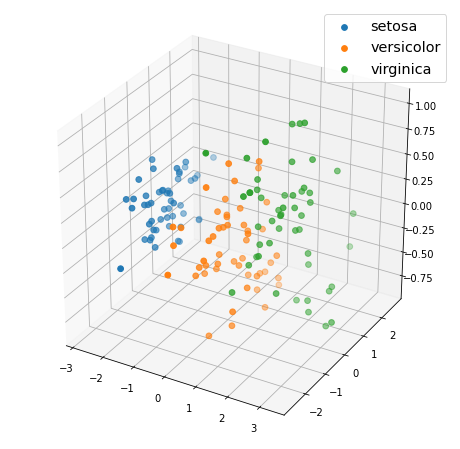

In [11]:
fig=plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for name, irissubset in final_df.groupby(['species']):
    ax.scatter(irissubset['principle_component_1'], irissubset['principle_component_2'], irissubset['principle_component_3'], 
               label=name, s=33)
    
ax.legend(fontsize='x-large')